In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
# Check shape of data (r,c)
data.shape

(7920, 3)

In [5]:
# Check duplication
data.duplicated().sum()

0

In [6]:
# Check null
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Filtering

Text filtering (text preprocessing)

- Convert Uppercase to Lowercase
- Remove Links
- Remove Punctuation
- Remove Numbers
- Remove Stopwords
- Stemming

In [7]:
# Regular Expressions
import re

# Python String Module
import string

Convert Uppercase to Lowercase

In [8]:
# Before
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
# After
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Links

In [11]:
# Before
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [12]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x, flags=re.MULTILINE) for x in x.split()))

In [13]:
# After
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Punctuation

In [14]:
# Before
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [15]:
# List punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [17]:
# After
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove Numbers

In [18]:
# Before
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [19]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True) # Displayed an error, but worked

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\manul\AppData\Local\Temp\ipykernel_8908\3233021088.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True) # Displayed an error, but worked


In [20]:
# After
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stopwords

In [21]:
# Before
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [22]:
!pip install nltk

In [23]:
# The Natural Language Toolkit (NLTK)
import nltk

In [24]:
# Download stopwords
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
# After
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [29]:
# Before
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [30]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [31]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [32]:
# After
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

Dataset after text filtering

In [33]:
data["tweet"]

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

### Building Vocabulary

In [46]:
from collections import Counter
vocab = Counter()

In [47]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [49]:
len(vocab)

15949

In [51]:
data.shape

(7920, 3)

We observed a discrepancy between the number of unique words in our data (about 7920) and the count reported by our Counter object (about 15949). This suggests overfitting, where the Counter may have counted extra words not present in our data due to issues like improper data preprocessing or data leakage from a larger dataset.

In [54]:
tokens = [key for key in vocab if vocab[key] > 10]
len(tokens)

1145

row > col
recod > features

if train accuracy > test accuracy
then it's overfitting

In [55]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Dataset

In [57]:
X = data['tweet']
y = data['label']

In [63]:
!pip install scikit-learn

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
X_train.shape

(6336,)

In [68]:
X_test.shape

(1584,)

In [69]:
y_train.shape

(6336,)

In [71]:
y_test.shape

(1584,)

Making vocabulary
Vectorization

In [72]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    
    return vectorized_list_new

In [73]:
vectorized_x_train = vectorizer(X_train, tokens)

In [75]:
vectorized_x_test = vectorizer(X_test, tokens)

In [77]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_train.value_counts()

label
0    4727
1    1609
Name: count, dtype: int64

We can see here this is an imbalanced dataset. This will be impact for our model. Let's do plot testing.

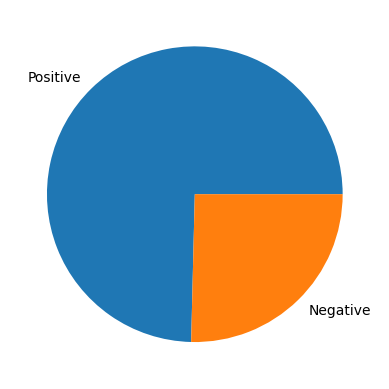

In [79]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

### Handle imbalanced dataset

In [80]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 281.8 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 438.9 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 547.6 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 573.4 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 835.3 kB/s eta 0:00:00


In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9454, 1145) (9454,)


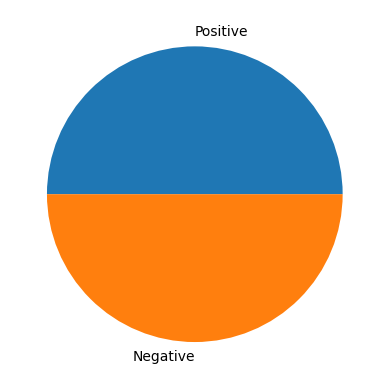

In [82]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

## Model Building

This is a binary classification problem

### Model Training and Evaluation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy: {acc}\n\tPrecision: {pr}\n\tRecall: {rec}\n\tF1: {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores:\n\tAccuracy: {acc}\n\tPrecision: {pr}\n\tRecall: {rec}\n\tF1: {f1}')

### Logistic Regression

In [108]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote) # Run y_train_pred and y_train_smote to check
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,  y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 0.94
	Precision: 0.915
	Recall: 0.971
	F1: 0.942
Validation Scores:
	Accuracy: 0.876
	Precision: 0.717
	Recall: 0.871
	F1: 0.787


### Naive Bayes

In [109]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote) # Run y_train_pred and y_train_smote to check
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,  y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 0.908
	Precision: 0.871
	Recall: 0.957
	F1: 0.912
Validation Scores:
	Accuracy: 0.854
	Precision: 0.667
	Recall: 0.892
	F1: 0.763


### Decision Tree

In [112]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote) # Run y_train_pred and y_train_smote to check
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,  y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1: 1.0
Validation Scores:
	Accuracy: 0.828
	Precision: 0.661
	Recall: 0.707
	F1: 0.684


### Random Forest

In [113]:
rt = RandomForestClassifier()
rt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rt.predict(vectorized_x_train_smote) # Run y_train_pred and y_train_smote to check
y_test_pred = rt.predict(vectorized_x_test)

training_scores(y_train_smote,  y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1: 1.0
Validation Scores:
	Accuracy: 0.878
	Precision: 0.77
	Recall: 0.763
	F1: 0.766


### Support Vector Machine

In [114]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote) # Run y_train_pred and y_train_smote to check
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote,  y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 0.978
	Precision: 0.961
	Recall: 0.997
	F1: 0.979
Validation Scores:
	Accuracy: 0.879
	Precision: 0.737
	Recall: 0.839
	F1: 0.785


## Save and load model

In [115]:
import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr, file)